In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
df_diabetes = pd.read_csv('../data/diabetes.csv', sep=',')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df_diabetes.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
147,2,106,64,35,119,30.5,1.400,34,0
61,8,133,72,0,0,32.9,0.270,39,1
400,4,95,64,0,0,32.0,0.161,31,1
603,7,150,78,29,126,35.2,0.692,54,1
513,2,91,62,0,0,27.3,0.525,22,0
0,6,148,72,35,0,33.6,0.627,50,1
53,8,176,90,34,300,33.7,0.467,58,1
542,10,90,85,32,0,34.9,0.825,56,1
315,2,112,68,22,94,34.1,0.315,26,0
137,0,93,60,25,92,28.7,0.532,22,0


* Pregnacies: Número de embarazos
* SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
* Insulin: Insulina sérica de 2 hrs
* BMI: Índice de masa corporal. 
* DiabetesPedigreeFunction: Función del pedigrí de la diabétes. 
* Outcome: Variable de clase (Si la per4sona posee o no diabétes) 


In [9]:
df_diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**ENTRENAMIENTO**

In [10]:
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

In [11]:
X.shape

(768, 8)

In [12]:
y.shape

(768,)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=00000)

In [14]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10, random_state=00000)
# n_estimators es el número de3 árboles a emplear

In [15]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [16]:
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

**EVALUACIÓN DEL MODELO**

In [17]:
from sklearn.metrics import accuracy_score

train_accuracy =  accuracy_score(y_train, y_train_pred)
test_accuracy =  accuracy_score(y_test, y_test_pred)

print('Accuracy Train: ', train_accuracy)
print('Accuracy Test: ', test_accuracy)


Accuracy Train:  0.9776536312849162
Accuracy Test:  0.7662337662337663


In [18]:
# Verificamos el features importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending=False)

feature_importances_df

,feature,importance
1,Glucose,0.252983
7,Age,0.172710
5,BMI,0.157963
6,DiabetesPedigreeFunction,0.118139
3,SkinThickness,0.086799
2,BloodPressure,0.074944
4,Insulin,0.073305
0,Pregnancies,0.063155


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Glucose'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'BMI'),
  Text(3, 0, 'DiabetesPedigreeFunction'),
  Text(4, 0, 'SkinThickness'),
  Text(5, 0, 'BloodPressure'),
  Text(6, 0, 'Insulin'),
  Text(7, 0, 'Pregnancies')])

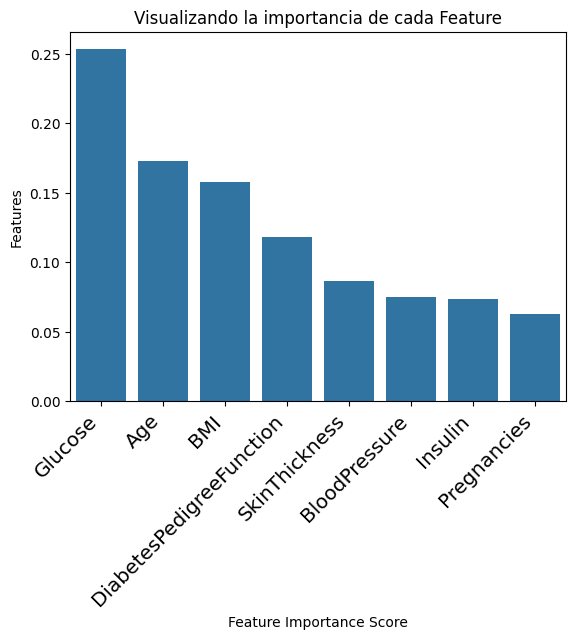

In [19]:
import seaborn as sns

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizando la importancia de cada Feature")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")


Podemos inhtentar cambiar el número de estimaadores de nuestro modelo (10) para intentar mejorar su exactitud. 

In [25]:
random_forest = RandomForestClassifier(n_estimators=40, random_state=00000)

random_forest.fit(X_train,y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

train_accuracy =  accuracy_score(y_train, y_train_pred)
test_accuracy =  accuracy_score(y_test, y_test_pred)

print('Accuracy Train: ', train_accuracy)
print('Accuracy Test: ', test_accuracy)

Accuracy Train:  1.0
Accuracy Test:  0.7705627705627706


In [26]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=00000)

random_forest.fit(X_train,y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

train_accuracy =  accuracy_score(y_train, y_train_pred)
test_accuracy =  accuracy_score(y_test, y_test_pred)

print('Accuracy Train: ', train_accuracy)
print('Accuracy Test: ', test_accuracy)

Accuracy Train:  1.0
Accuracy Test:  0.7792207792207793


In [27]:
random_forest = RandomForestClassifier(n_estimators=200, random_state=00000)

random_forest.fit(X_train,y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

train_accuracy =  accuracy_score(y_train, y_train_pred)
test_accuracy =  accuracy_score(y_test, y_test_pred)

print('Accuracy Train: ', train_accuracy)
print('Accuracy Test: ', test_accuracy)

Accuracy Train:  1.0
Accuracy Test:  0.7835497835497836


In [28]:
random_forest = RandomForestClassifier(n_estimators=500, random_state=00000)

random_forest.fit(X_train,y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

train_accuracy =  accuracy_score(y_train, y_train_pred)
test_accuracy =  accuracy_score(y_test, y_test_pred)

print('Accuracy Train: ', train_accuracy)
print('Accuracy Test: ', test_accuracy)

Accuracy Train:  1.0
Accuracy Test:  0.7922077922077922
